In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Read Dataset

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
print('Dataset :',data.shape)
data.info()
data[0:10]

Dataset : (400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


**VISUALIZING THE DATA
**

C:\Users\Mohamed_Samir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


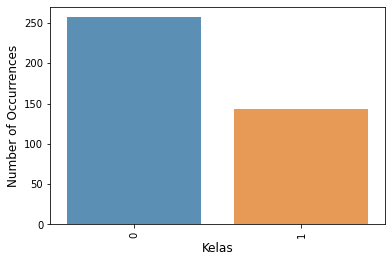

In [3]:
cnt_pro = data['Purchased'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Kelas', fontsize=12)
plt.xticks(rotation=90)
plt.show();

C:\Users\Mohamed_Samir\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


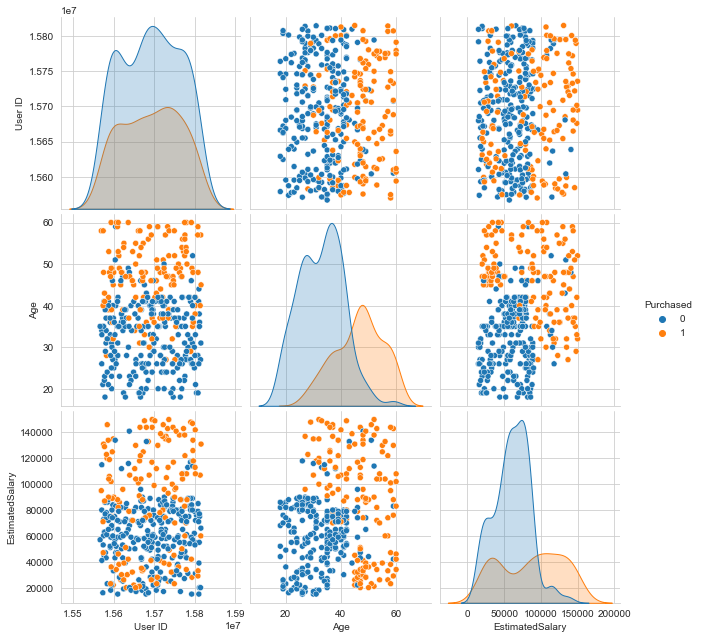

In [4]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Purchased",size=3);
plt.show()

# Plotting Heatmap
Heatmap can be defined as a method of graphically representing numerical data where individual data points contained in the matrix are represented using different colors. The colors in the heatmap can denote the frequency of an event, the performance of various metrics in the data set, and so on. Different color schemes are selected by varying businesses to present the data they want to be plotted on a heatmap [2].

<AxesSubplot:>

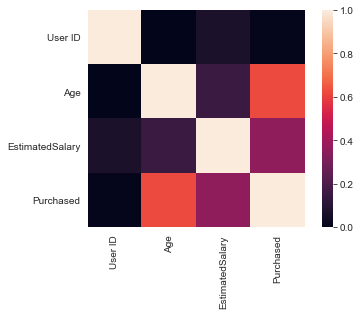

In [5]:
data = data[['User ID','Gender','Age','EstimatedSalary','Purchased']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

In [6]:
#Convert sting to numeric
Gender  = {'Male': 1,'Female': 0} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
data.Gender = [Gender[item] for item in data.Gender] 
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


# Spliting data
Data for training and testing
To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 10% ( aims to reduce the overfitting effect).

In [7]:
from sklearn.model_selection import train_test_split
Y = data['Purchased']
X = data.drop(columns=['Purchased'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [8]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (360, 4)
Y train shape:  (360,)
X test shape:  (40, 4)
Y test shape:  (40,)


Build Model use Random Forest

In [9]:
# We define the number of trees in the forest in 100. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

In [10]:
test_acc_rfcla = round(rfcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_rfcla = round(rfcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

# Measurement
When the classification process was already done. This work evaluated
the results using the Confusion Matrix.

# Confusion matrix
Confusion Matrix is commonly used for a summarization of prediction results
on a classification problem.The number of correct and incorrect predictions 
is summarized with counting values and each value broken down for each class. 
Each of them is the key to the confusion matrix. It shows the classification 
model is confused when it makes predictions, at this point in here it gives us 
insight not only into the errors being made by a classifier but also show the 
types of errors that are being made [[3](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)]. 

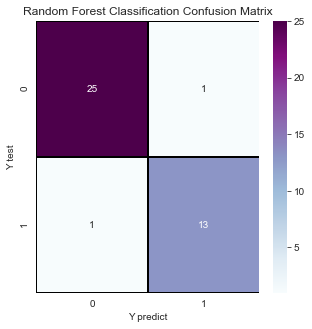

In [11]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Result

# Accuracy
is closeness of the measurements to a specific value. Accuracy has two definitions:

1. More commonly, it is a description of systematic errors, a measure of statistical bias; low accuracy causes a difference between a result and a "true" value. ISO calls this trueness.
1. Alternatively, ISO defines[[1](https://en.wikipedia.org/wiki/Accuracy_and_precision)] accuracy as describing a combination of both types of observational error above (random and systematic), so high accuracy requires both high precision and high trueness.

In [12]:
model1 = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Score': [train_acc_rfcla],
    'Test Score': [test_acc_rfcla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,Random Forest,100.0,95.0


# Precision and Recall
Precision is a description of random errors, a measure of statistical variability. In simpler terms, given a set of data points from repeated measurements of the same quantity, the set can be said to be accurate if their average is close to the true value of the quantity being measured, while the set can be said to be precise if the values are close to each other. While Recall is defined as the fraction of relevant documents retrieved compared to the total number of relevant documents (true positives divided by true positives+false negatives).

In [13]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict5)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.89


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.89')

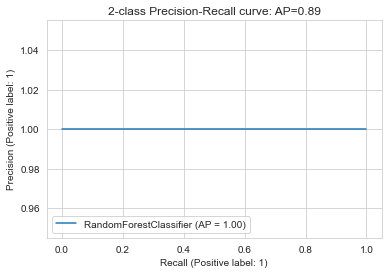

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rfcla,X_train, Y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Great Work 